In [12]:
#Team members: 
#Jitendra Savanur - 111491676 (jitendra.savanur@stonybrook.edu)
#Chaitanya Kalantri - 111446728 (chaitanya.kalantri@stonybrook.edu)
#Abhinav Jain - 111495982 (abhinav.jain@stonybrook.edu)

import numpy as np
import pandas as pd

data_2017 = pd.read_csv("C:\\Users\\Jitendra Savanur\\Documents\\Data Science Fundamentals\\HomeWorks\\HW3\\latest data\\properties_2017.csv")

C:\Users\Jitendra Savanur\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2705: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [87]:
data_2017.columns

Index(['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildin

In [186]:
#We shall consider the following columns for this homework
#'parcelid',
#'bathroomcnt'
#'roomcnt'
#'buildingqualitytypeid'
#'calculatedfinishedsquarefeet'
#'yearbuilt'
#'taxvaluedollarcnt'
#'taxamount'
#'poolcnt'
#'unitcnt'
#'garagecarcnt'
#'longitude'
#'latitude'
data_with_cols_to_consider = data_2017[['parcelid','bathroomcnt','roomcnt','buildingqualitytypeid','calculatedfinishedsquarefeet','yearbuilt','taxvaluedollarcnt','taxamount','poolcnt','unitcnt','garagecarcnt','longitude','latitude']]
data_with_cols_to_consider.count()

parcelid                        2985217
bathroomcnt                     2982260
roomcnt                         2982248
buildingqualitytypeid           1941395
calculatedfinishedsquarefeet    2940120
yearbuilt                       2937384
taxvaluedollarcnt               2950951
taxamount                       2962465
poolcnt                          539632
unitcnt                         1981042
garagecarcnt                     891008
longitude                       2982285
latitude                        2982285
dtype: int64

In [187]:
#Data cleaning:
#We shall replace the NaN values for bathroomcnt, roomcnt, buildingqualitytypeid, yearbuilt with the column median
data_with_cols_to_consider.bathroomcnt.fillna(data_with_cols_to_consider.bathroomcnt.median(), inplace = True)
data_with_cols_to_consider.roomcnt.fillna(data_with_cols_to_consider.roomcnt.median(), inplace = True)
data_with_cols_to_consider.buildingqualitytypeid.fillna(data_with_cols_to_consider.buildingqualitytypeid.median(), inplace = True)
data_with_cols_to_consider.yearbuilt.fillna(data_with_cols_to_consider.yearbuilt.median(), inplace = True)

#For calculatedfinishedsquarefeet, taxvaluedollarcnt, taxamount we replace the NaN values with the column mean
data_with_cols_to_consider.calculatedfinishedsquarefeet.fillna(data_with_cols_to_consider.calculatedfinishedsquarefeet.mean(), inplace = True)
data_with_cols_to_consider.taxvaluedollarcnt.fillna(data_with_cols_to_consider.taxvaluedollarcnt.mean(), inplace = True)
data_with_cols_to_consider.taxamount.fillna(data_with_cols_to_consider.taxamount.mean(), inplace = True)

#For poolcnt and garage cnt we replace NaN values with 0, considering no swimming pool
#For unitcnt, we replace the NaN values with the mode of unitcnt column

data_with_cols_to_consider.poolcnt.fillna(0, inplace = True)
data_with_cols_to_consider.unitcnt.fillna(data_with_cols_to_consider.unitcnt.mode()[0], inplace = True)
data_with_cols_to_consider.garagecarcnt.fillna(0, inplace = True)


C:\Users\Jitendra Savanur\Anaconda3\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [188]:
#Creating a dictionary of maximum values for the columns to consider.
#We require this for the desirability function
max_of_all_columns = data_with_cols_to_consider.max()
max_values_dict = dict(max_of_all_columns)
max_values_dict

{'bathroomcnt': 32.0,
 'buildingqualitytypeid': 12.0,
 'calculatedfinishedsquarefeet': 952576.0,
 'garagecarcnt': 25.0,
 'latitude': 34819650.0,
 'longitude': -117554316.0,
 'parcelid': 169601949.0,
 'poolcnt': 1.0,
 'roomcnt': 96.0,
 'taxamount': 3823175.6499999999,
 'taxvaluedollarcnt': 319622473.0,
 'unitcnt': 997.0,
 'yearbuilt': 2016.0}

In [189]:
data_with_cols_to_consider.count()

parcelid                        2985217
bathroomcnt                     2985217
roomcnt                         2985217
buildingqualitytypeid           2985217
calculatedfinishedsquarefeet    2985217
yearbuilt                       2985217
taxvaluedollarcnt               2985217
taxamount                       2985217
poolcnt                         2985217
unitcnt                         2985217
garagecarcnt                    2985217
longitude                       2982285
latitude                        2982285
dtype: int64

In [118]:
#We will assign weights to each of the features we are considering for scoring. More the weight,
#more is the impact of that parameter in deciding the desirability of the house
#We will get a final desirability score out of 100
weights = {'bathroomcnt': 14,
 'buildingqualitytypeid': 10,
 'calculatedfinishedsquarefeet': 12,
 'garagecarcnt': 10,
 'poolcnt': 10,
 'roomcnt': 13,
 'taxamount': 8,
 'taxvaluedollarcnt': 8,
 'unitcnt': 12,
 'yearbuilt': 3}

all_scores = []
data_with_cols_to_consider1 = data_with_cols_to_consider
for index, row in data_with_cols_to_consider1.iterrows():
    score = (float) ((row['bathroomcnt']*weights['bathroomcnt']/max_values_dict['bathroomcnt'])+\
                     (weights['buildingqualitytypeid']*(1-(row['buildingqualitytypeid']/max_values_dict['buildingqualitytypeid'])))+\
                     (row['calculatedfinishedsquarefeet']*weights['calculatedfinishedsquarefeet']/max_values_dict['calculatedfinishedsquarefeet'])+\
                     (row['garagecarcnt']*weights['garagecarcnt']/max_values_dict['garagecarcnt'])+\
                     (row['poolcnt']*weights['poolcnt']/max_values_dict['poolcnt'])+\
                     (row['roomcnt']*weights['roomcnt']/max_values_dict['roomcnt'])+\
                     (row['taxamount']*weights['taxamount']/max_values_dict['taxamount'])+\
                     (row['taxvaluedollarcnt']*weights['taxvaluedollarcnt']/max_values_dict['taxvaluedollarcnt'])+\
                     (row['unitcnt']*weights['unitcnt']/max_values_dict['unitcnt'])+\
                     (row['yearbuilt']*weights['yearbuilt']/max_values_dict['yearbuilt']))
    all_scores.append(score)
data_with_cols_to_consider1 = data_with_cols_to_consider1.assign(desirability_score = all_scores) 
data_with_cols_to_consider1 = data_with_cols_to_consider1.sort_values(['desirability_score'], ascending=[False])
data_with_cols_to_consider1.to_csv("C:\\Users\\Jitendra Savanur\\Documents\\Data Science Fundamentals\\HomeWorks\\HW3\\latest data\\with_desirability_scores.csv", index = False)

In [119]:
#the 10 best houses according to the scoring function
data_with_cols_to_consider1[0:9]

,parcelid,bathroomcnt,roomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,yearbuilt,taxvaluedollarcnt,taxamount,poolcnt,unitcnt,garagecarcnt,desirability_score
1252741,11984395,0.0,0.0,6.0,472363.0,2014.0,271004605.0,3277055.20,1.0,478.0,0.0,43.341199
462377,12560578,0.0,0.0,6.0,617114.0,2010.0,83885166.0,1030259.32,1.0,951.0,0.0,41.466880
1938915,11467277,0.0,0.0,6.0,522511.0,2008.0,151895087.0,1840935.06,1.0,401.0,0.0,37.050887
342941,11746970,0.0,0.0,6.0,520825.0,2013.0,287098486.0,3458861.12,0.0,464.0,0.0,34.564953
254641,17284931,8.5,16.0,6.0,12451.0,1996.0,5334922.0,56903.60,1.0,1.0,25.0,34.277143
2296330,11645396,32.0,0.0,6.0,39170.0,2009.0,31038350.0,372142.72,1.0,4.0,0.0,34.086753
1041194,14324358,14.5,0.0,6.0,27100.0,2009.0,16452056.0,179778.36,1.0,1.0,20.0,33.474733
2456847,14088483,3.5,96.0,6.0,3273.0,2013.0,1107323.0,12463.48,1.0,1.0,2.0,33.433849
1429196,14324508,12.5,0.0,6.0,20327.0,1998.0,35843418.0,376550.62,1.0,1.0,19.0,32.995145


In [121]:
#The 10 worst houses according to scoring function
data_with_cols_to_consider1[-10:-1]

,parcelid,bathroomcnt,roomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,yearbuilt,taxvaluedollarcnt,taxamount,poolcnt,unitcnt,garagecarcnt,desirability_score
201747,12547065,1.0,0.0,12.0,990.0,1984.0,231741.0,2864.20,0.0,1.0,0.0,3.426182
22869,12547014,1.0,0.0,12.0,960.0,1984.0,203927.0,2541.33,0.0,1.0,0.0,3.424433
440708,12547020,1.0,0.0,12.0,940.0,1984.0,190168.0,2300.46,0.0,1.0,0.0,3.423332
2707016,12547024,1.0,0.0,12.0,1010.0,1984.0,129246.0,1599.01,0.0,1.0,0.0,3.421221
1525737,11623455,1.0,0.0,12.0,827.0,1964.0,480409.0,5807.33,0.0,1.0,0.0,3.406749
2777846,11623473,1.0,0.0,12.0,822.0,1964.0,350034.0,4169.81,0.0,1.0,0.0,3.399997
735112,11578826,0.0,0.0,12.0,5867.0,2012.0,4071152.0,47006.16,0.0,1.0,0.0,3.280252
168294,11579976,0.0,0.0,12.0,5936.0,2008.0,3573782.0,41439.62,0.0,1.0,0.0,3.251072
1416457,11683433,0.0,0.0,12.0,8308.0,1973.0,1163957.0,50101.48,0.0,1.0,0.0,3.186678


In [153]:
data_with_cols_to_consider1.describe().to_csv("C:\\Users\\Jitendra Savanur\\Documents\\Data Science Fundamentals\\HomeWorks\\HW3\\latest data\\data_dscription.csv")

In [205]:
#Pairwise distance function
#This function gives us the distance between two property instances
#For convenience of calculations, we scale down the values for 'calculatedfinishedsquarefeet','taxvaluedollarcnt','taxamount'
#by taking their log values
import math
def getDistance(house_row_1, house_row_2):
    columns_for_direct_distance = ['bathroomcnt','roomcnt','buildingqualitytypeid','yearbuilt','poolcnt','unitcnt','garagecarcnt']
    columns_for_log = ['calculatedfinishedsquarefeet','taxvaluedollarcnt','taxamount']
    distance = 0
    for column_name in columns_for_direct_distance:
        distance += abs(house_row_1[column_name] - house_row_2[column_name])
    for column_name in columns_for_log:
        distance += abs(math.log(house_row_1[column_name]) - math.log(house_row_2[column_name]))
    distance += abs(house_row_1['latitude'] - house_row_2['latitude']) / 1000000
    distance += abs(house_row_1['longitude'] - house_row_2['longitude']) / 1000000
    
    return distance

In [206]:
getDistance(data_with_cols_to_consider.iloc[1500000,:], data_with_cols_to_consider.iloc[1500001,:])

bathroomcnt :  1.0
roomcnt :  0.0
buildingqualitytypeid :  1.0
yearbuilt :  3.0
poolcnt :  0.0
unitcnt :  0.0
garagecarcnt :  0.0
calculatedfinishedsquarefeet :  0.23889190828234863
taxvaluedollarcnt :  0.3046488024341798
taxamount :  0.26188216775152284
latitude:  0.002717
longitude:  0.010935


5.8190748784680508

In [207]:
#we have used KMeans clustering to cluster the data into 10 clusters
#We have used the desirability score as a metric to compute the distance through KMeans
x_data = data_with_cols_to_consider1[['parcelid','desirability_score']]
x_data = x_data
from sklearn import cluster
import time
t0 = time.time()
k=10
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(x_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print("Clustering done.. now plotting the data. time required: ",(time.time()-t0)/60," minutes")


Clustering done.. now plotting the data. time required:  1.0687174638112387  minutes


In [210]:
from matplotlib import pyplot as plt
label = kmeans.labels_
plt.figure()
plt.scatter(x_data.iloc[:,0],x_data.iloc[:,1],c=label)

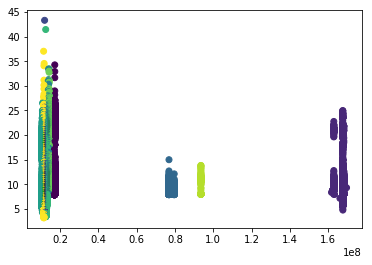

In [211]:
plt.show()

[1145 1908 5144  458 4131]


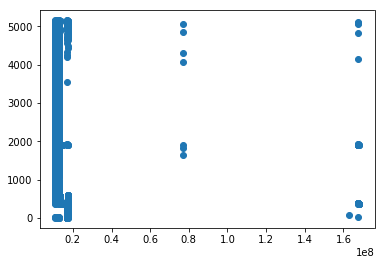

In [415]:
#Pairwise distance function
#Note: the function getDistanceFcluster is same as the method getDistance above, only difference being that
#getDistanceFcluster is suited to take numpy arrays as inputs. The distance computation logic is similar in both cases
import math
def getDistanceFcluster(row_list_1, row_list_2):
    columns_for_direct_distance = ['bathroomcnt','roomcnt','buildingqualitytypeid','yearbuilt','poolcnt','unitcnt','garagecarcnt']
    columns_for_log = ['calculatedfinishedsquarefeet','taxvaluedollarcnt','taxamount']
    distance = 0
    for index in range(6):
        distance += abs(row_list_1[index] - row_list_2[index])
    index = 7
    while index < 10:
        distance += abs(math.log(row_list_1[index]) - math.log(row_list_2[index]))
        index += 1
    
    distance += abs(row_list_1[10] - row_list_2[11]) / 1000000
    distance += abs(row_list_1[10] - row_list_2[11]) / 1000000
    
    return distance

from matplotlib import pyplot
from scipy.cluster.hierarchy import fclusterdata

data_to_cluster = data_with_cols_to_consider[0:10000]

array_list =[]
for index, row in data_to_cluster.iterrows():
    row_array_list = []
    row_array_list.append(row.bathroomcnt)
    row_array_list.append(row.roomcnt)
    row_array_list.append(row.buildingqualitytypeid)
    row_array_list.append(row.yearbuilt)
    row_array_list.append(row.poolcnt)
    row_array_list.append(row.unitcnt)
    row_array_list.append(row.garagecarcnt)
    
    row_array_list.append(row.calculatedfinishedsquarefeet)
    row_array_list.append(row.taxvaluedollarcnt)
    row_array_list.append(row.taxamount)
    
    row_array_list.append(row.longitude)
    row_array_list.append(row.latitude)
    
    row_array = np.array(row_array_list)
    array_list.append(row_array)
array = np.array(array_list)
fclust = fclusterdata(array, 1.0, metric=getDistanceFcluster)
print(fclust[0:5])
plt.scatter(data_to_cluster[['parcelid']], fclust)
plt.show()

In [353]:
#External data merging
#We have identified certain parameters like, density of population, total population, average wage, etc.
#based on longitude and latitude
#We obtained this data through uszipcode library available in Python.
#To fetch information for 100,000 pairs of longitude and latitude,
#it took us around 30 minutes on Mac and around 50 minutes on Windows 
#We have created csv files with the parcelid as the primary key and the above mentioned features
#obtained for the longitudes and latitudes of each parcelid
import os
external_data_file_names = os.listdir("C:\\Users\\Jitendra Savanur\\Documents\\Data Science Fundamentals\\HomeWorks\\HW3\\latest data\\data_with_external_data")
print(external_data_file_names)
external_data_dfs = []
for file_name in external_data_file_names:
    file_name = file_name.replace("'","")
    file_path = "C:\\\\Users\\\\Jitendra Savanur\\\\Documents\\\\Data Science Fundamentals\\\\HomeWorks\\\\HW3\\\\latest data\\\\data_with_external_data\\\\"+file_name
    #print(file_path)
    external_data_dfs.append(pd.read_csv(file_path))
    #break
len(external_data_dfs)

external_data_df_all = pd.concat(external_data_dfs)
print(len(external_data_df_all))
external_data_df_all.head()

['external_data_0k_1k.csv', 'external_data_10k_11k.csv', 'external_data_11k_12k.csv', 'external_data_12k_13k.csv', 'external_data_13k_14k.csv', 'external_data_14k_15k.csv', 'external_data_15k_16k.csv', 'external_data_16k_17k.csv', 'external_data_17k_18k.csv', 'external_data_18k_19k.csv', 'external_data_19k_21k.csv', 'external_data_1k_2k.csv', 'external_data_21k_22k.csv', 'external_data_22k_23k.csv', 'external_data_23k_24k.csv', 'external_data_24k_25k.csv', 'external_data_25k_26k.csv', 'external_data_26k_27k.csv', 'external_data_27k_rest.csv', 'external_data_2k_3k.csv', 'external_data_3k_4k.csv', 'external_data_4k_5k.csv', 'external_data_5k_6k.csv', 'external_data_6k_7k.csv', 'external_data_7k_8k.csv', 'external_data_8k_9k.csv', 'external_data_9k_10k.csv']
2982285


,parcelid,density,population,averagewage,zipcode,totalwage
0,10754147,962.883895,25709,51537.701233,91302,1.324983e+09
1,10759547,3405.928854,25851,39841.800820,91364,1.029950e+09
2,10843547,7043.458980,31766,24086.365076,90230,7.651275e+08
3,10859147,7108.027523,30991,32853.175438,91423,1.018153e+09
4,10879947,13500.900901,44958,12126.828596,91606,5.451980e+08


In [354]:
#Now we will merge our data to consider for the analysis with the external data
data_with_external_data = pd.merge(data_with_cols_to_consider, external_data_df_all, on='parcelid')
data_with_external_data.columns
data_with_external_data.head()
print(len(data_with_external_data))

2982285


In [355]:
training_data_2016 = pd.read_csv("C:\\Users\\Jitendra Savanur\\Documents\\Data Science Fundamentals\\HomeWorks\\HW3\\latest data\\train_2016_v2.csv")
training_data_with_all_params_2016 = pd.merge(training_data_2016, data_with_external_data, on = 'parcelid')
training_data_with_all_params_2016.head()

,parcelid,logerror,transactiondate,bathroomcnt,roomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,yearbuilt,taxvaluedollarcnt,taxamount,poolcnt,unitcnt,garagecarcnt,longitude,latitude,density,population,averagewage,zipcode,totalwage
0,11016594,0.0276,2016-01-01,2.0,0.0,8.0,1684.0,1959.0,545000.0,6735.88,0.0,1.0,0.0,-118488536.0,34280990.0,3153.382084,51747,21296.702437,91344,1.102040e+09
1,14366692,-0.1684,2016-01-01,3.5,0.0,6.0,2263.0,2014.0,974900.0,10153.02,0.0,1.0,2.0,-117677556.0,33668120.0,6216.596639,59182,25693.683333,92630,1.520604e+09
2,12098116,-0.0040,2016-01-01,3.0,0.0,8.0,2217.0,1940.0,989500.0,11484.48,0.0,1.0,0.0,-118175032.0,34136312.0,3049.864499,11254,47317.709081,91105,5.325135e+08
3,12643413,0.0218,2016-01-02,2.0,0.0,7.0,839.0,1987.0,248613.0,3048.74,0.0,1.0,0.0,-118309000.0,33755800.0,6138.081395,21115,25806.898603,90732,5.449127e+08
4,14432541,-0.0050,2016-01-02,2.5,8.0,6.0,2283.0,1981.0,441177.0,5488.96,1.0,1.0,2.0,-117700234.0,33485643.0,5060.117878,25756,30723.228141,92629,7.913075e+08


In [356]:
training_data_2017 = pd.read_csv("C:\\Users\\Jitendra Savanur\\Documents\\Data Science Fundamentals\\HomeWorks\\HW3\\latest data\\train_2017.csv")
training_data_with_all_params_2017 = pd.merge(training_data_2017, data_with_external_data, on = 'parcelid')
training_data_with_all_params_2017.head()

,parcelid,logerror,transactiondate,bathroomcnt,roomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,yearbuilt,taxvaluedollarcnt,taxamount,poolcnt,unitcnt,garagecarcnt,longitude,latitude,density,population,averagewage,zipcode,totalwage
0,14297519,0.025595,2017-01-01,3.5,0.0,6.0,3100.0,1998.0,1023282.0,11013.72,0.0,1.0,2.0,-117869207.0,33634931.0,3565.266393,34797,45621.763198,92660,1.587500e+09
1,17052889,0.055619,2017-01-01,1.0,5.0,6.0,1465.0,1967.0,464000.0,5672.48,0.0,1.0,1.0,-119281531.0,34449266.0,1321.645022,6106,19964.041435,93022,1.219004e+08
2,14186244,0.005383,2017-01-01,2.0,6.0,6.0,1243.0,1962.0,564778.0,6488.30,1.0,1.0,2.0,-117823170.0,33886168.0,3161.167685,46564,32922.677691,92886,1.533012e+09
3,12177905,-0.103410,2017-01-01,3.0,0.0,8.0,2376.0,1970.0,145143.0,1777.51,1.0,1.0,0.0,-118240722.0,34245180.0,4020.662252,30356,24465.294439,91214,7.426685e+08
4,10887214,0.006940,2017-01-01,3.0,0.0,8.0,1312.0,1964.0,119407.0,1533.89,1.0,1.0,0.0,-118414640.0,34185120.0,11386.956522,39285,15943.788163,91401,6.263517e+08


In [357]:
parcel_ids_to_predict = pd.read_csv("C:\\Users\\Jitendra Savanur\\Documents\\Data Science Fundamentals\\HomeWorks\\HW3\\latest data\\sample_submission.csv")
parcel_ids_to_predict = parcel_ids_to_predict[['ParcelId']]
submission_df = pd.DataFrame(columns = ('ParcelId','201610','201611','201612','201710','201711','201712'))
submission_df.columns
training_data_with_all_params_2017.columns

Index(['parcelid', 'logerror', 'transactiondate', 'bathroomcnt', 'roomcnt',
       'buildingqualitytypeid', 'calculatedfinishedsquarefeet', 'yearbuilt',
       'taxvaluedollarcnt', 'taxamount', 'poolcnt', 'unitcnt', 'garagecarcnt',
       'longitude', 'latitude', 'density', 'population', 'averagewage',
       'zipcode', 'totalwage'],
      dtype='object')

In [358]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

data_x_2016 = training_data_with_all_params_2016[['bathroomcnt', 'roomcnt',\
    'buildingqualitytypeid', 'calculatedfinishedsquarefeet', \
    'yearbuilt','taxvaluedollarcnt', 'taxamount', 'poolcnt', 'unitcnt', \
    'garagecarcnt','density', 'population', 'averagewage',
       'totalwage']]
data_x_2016 = data_x_2016.fillna(data_x_2016.median(), inplace=True)
data_x_2017 = training_data_with_all_params_2017[['bathroomcnt', 'roomcnt',\
    'buildingqualitytypeid', 'calculatedfinishedsquarefeet', \
    'yearbuilt','taxvaluedollarcnt', 'taxamount', 'poolcnt', 'unitcnt', \
    'garagecarcnt','density', 'population', 'averagewage',
       'totalwage']]
data_x_2017 = data_x_2017.fillna(data_x_2017.median(), inplace=True)

data_y_2016 = training_data_with_all_params_2016[['logerror']]
data_y_2017 = training_data_with_all_params_2017[['logerror']]

#Fitting the data into a linear regression model
#We have used the training sets given for 2016 and 2017 respectively
#to predict the logerror values for those years
regr_2016 = linear_model.LinearRegression()
regr_2016.fit(data_x_2016, data_y_2016)
print("Model created for 2016")
regr_2017 = linear_model.LinearRegression()
regr_2017.fit(data_x_2017, data_y_2017)
print("Model created for 2017")



C:\Users\Jitendra Savanur\Anaconda3\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Model created for 2016
Model created for 2017


In [359]:
#Fitting the data into Lasso regression
regr_2016_lasso = linear_model.Lasso()
regr_2016_lasso.fit(data_x_2016, data_y_2016)
print("Model created for lasso regr. 2016")
regr_2017_lasso = linear_model.Lasso()
regr_2017_lasso.fit(data_x_2017, data_y_2017)
print("Model created for lasso regr 2017")

Model created for lasso regr. 2016
Model created for lasso regr 2017


In [360]:
print(len(parcel_ids_to_predict))
data_for_prediction = pd.merge(parcel_ids_to_predict, data_with_external_data, left_on = 'ParcelId', right_on = 'parcelid', how='left')
len(data_for_prediction)

2985217


2985217

In [361]:
data_for_prediction.fillna(data_for_prediction.median(), inplace=True)
data_for_prediction.columns

Index(['ParcelId', 'parcelid', 'bathroomcnt', 'roomcnt',
       'buildingqualitytypeid', 'calculatedfinishedsquarefeet', 'yearbuilt',
       'taxvaluedollarcnt', 'taxamount', 'poolcnt', 'unitcnt', 'garagecarcnt',
       'longitude', 'latitude', 'density', 'population', 'averagewage',
       'zipcode', 'totalwage'],
      dtype='object')

In [362]:
data_for_prediction_without_parcelid = data_for_prediction[['bathroomcnt', 'roomcnt',\
       'buildingqualitytypeid', 'calculatedfinishedsquarefeet', 'yearbuilt',\
       'taxvaluedollarcnt', 'taxamount', 'poolcnt', 'unitcnt', 'garagecarcnt',\
       'density', 'population', 'averagewage','totalwage']]
predictions_2016 = regr_2016.predict(data_for_prediction_without_parcelid)
predictions_2016_list = [r[0] for r in predictions_2016]
print(predictions_2016_list[0:5])
predictions_2017 = regr_2017.predict(data_for_prediction_without_parcelid)
predictions_2017_list = [r[0] for r in predictions_2017]
print(predictions_2017_list[0:5])

parcel_ids_to_predict_lists = parcel_ids_to_predict.values.tolist()
parcel_ids_to_predict_list = [p[0] for p in parcel_ids_to_predict_lists]
print(parcel_ids_to_predict_list[0:5])

print(len(predictions_2016_list))
print(len(predictions_2017_list))
print(len(parcel_ids_to_predict_list))



[0.013197228522487059, 0.013257657762982517, 0.90950916823234462, 0.048405942913384847, 0.014879079951456542]
[0.014519250300444837, 0.014732498688489368, 0.84824588043334004, 0.051129464769221325, 0.016856984457603676]
[10754147, 10759547, 10843547, 10859147, 10879947]
2985217
2985217
2985217


In [366]:
predictions_2016_lasso_list = regr_2016_lasso.predict(data_for_prediction_without_parcelid)
predictions_2017_lasso_list = regr_2017_lasso.predict(data_for_prediction_without_parcelid)

parcel_ids_to_predict_lists = parcel_ids_to_predict.values.tolist()
parcel_ids_to_predict_list = [p[0] for p in parcel_ids_to_predict_lists]
print(parcel_ids_to_predict_list[0:5])

print(len(predictions_2016_lasso_list))
print(len(predictions_2017_lasso_list))
print(len(parcel_ids_to_predict_list))

[10754147, 10759547, 10843547, 10859147, 10879947]
2985217
2985217
2985217


In [367]:
#Creation of submission file for Linear regression and Lasso regression
submission_df_linear = pd.DataFrame({
    'ParcelId': parcel_ids_to_predict_list,
    '201610': predictions_2016_list,
    '201611': predictions_2016_list,
    '201612': predictions_2016_list,
    '201710': predictions_2017_list,
    '201711': predictions_2017_list,
    '201712': predictions_2017_list
})

submission_df_lasso = pd.DataFrame({
    'ParcelId': parcel_ids_to_predict_list,
    '201610': predictions_2016_lasso_list,
    '201611': predictions_2016_lasso_list,
    '201612': predictions_2016_lasso_list,
    '201710': predictions_2017_lasso_list,
    '201711': predictions_2017_lasso_list,
    '201712': predictions_2017_lasso_list
})

submission_df_linear = submission_df_linear[['ParcelId','201610','201611','201612','201710','201711','201712']]
submission_df_lasso = submission_df_lasso[['ParcelId','201610','201611','201612','201710','201711','201712']]
submission_df_linear.to_csv("C:\\Users\\Jitendra Savanur\\Documents\\Data Science Fundamentals\\HomeWorks\\HW3\\mypredictions_linear.csv", index=False)
submission_df_lasso.to_csv("C:\\Users\\Jitendra Savanur\\Documents\\Data Science Fundamentals\\HomeWorks\\HW3\\mypredictions_lasso.csv", index=False)

In [368]:
submission_df_linear.head()

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0.013197,0.013197,0.013197,0.014519,0.014519,0.014519
1,10759547,0.013258,0.013258,0.013258,0.014732,0.014732,0.014732
2,10843547,0.909509,0.909509,0.909509,0.848246,0.848246,0.848246
3,10859147,0.048406,0.048406,0.048406,0.051129,0.051129,0.051129
4,10879947,0.014879,0.014879,0.014879,0.016857,0.016857,0.016857


In [369]:
submission_df_lasso.head()

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0.016128,0.016128,0.016128,0.014393,0.014393,0.014393
1,10759547,0.015572,0.015572,0.015572,0.014689,0.014689,0.014689
2,10843547,0.625762,0.625762,0.625762,0.616091,0.616091,0.616091
3,10859147,0.032909,0.032909,0.032909,0.038861,0.038861,0.038861
4,10879947,0.010477,0.010477,0.010477,0.015483,0.015483,0.015483


In [292]:
#Calculation of p-value
len(training_data_with_all_params_2016)

90258

In [351]:
#p-value computation
#We will use 72000 rows from the training set to train the model and 5000 rows to compute our p-value
#We shall use mean squared error as a metric to compute p-value
p_value_training = training_data_with_all_params_2017[0:72000]
p_value_testing = training_data_with_all_params_2017[72000:]
p_value_testing.fillna(p_value_testing.median(), inplace=True)

p_value_training.columns
p_value_training_x = p_value_training[['bathroomcnt', 'roomcnt','buildingqualitytypeid', 'calculatedfinishedsquarefeet', 'yearbuilt',
       'taxvaluedollarcnt', 'taxamount', 'poolcnt', 'unitcnt', 'garagecarcnt','density', 'population', 'averagewage','totalwage']]
p_value_training_x.fillna(p_value_training_x.median(), inplace=True)

p_value_training_y = p_value_training[['logerror']]


regr_p_value = linear_model.LinearRegression()
regr_p_value.fit(p_value_training_x, p_value_training_y)
print("Model created for p-value computation")

predicted_logerrors = regr_p_value.predict(p_value_testing[['bathroomcnt', 'roomcnt','buildingqualitytypeid',
                                                            'calculatedfinishedsquarefeet', 'yearbuilt',
                                                            'taxvaluedollarcnt', 'taxamount', 'poolcnt', 'unitcnt',
                                                            'garagecarcnt','density', 'population',
                                                            'averagewage','totalwage']])

predicted_logerror_list = [r[0] for r in predicted_logerrors]
actual_logerrors = p_value_testing[['logerror']].values.tolist()
actual_logerror_list = [r[0] for r in actual_logerrors]
base_mean_squared_error = mean_squared_error(actual_logerror_list, predicted_logerror_list)
print("Base mean squared error: ",base_mean_squared_error)

C:\Users\Jitendra Savanur\Anaconda3\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Model created for p-value computation
Base mean squared error:  0.0381810838128


In [352]:
from random import shuffle

count_greater_than_base_mse = 0
count_smaller_than_base_mse = 0
#print(actual_logerror_list[0:5])
actual_logerror_list_shuffled = actual_logerror_list
shuffle(actual_logerror_list_shuffled)
#print(actual_logerror_list_shuffled[0:5])
for i in range(3000):
    current_mse = mean_squared_error(actual_logerror_list_shuffled, predicted_logerror_list)
    #print(current_mse)
    if current_mse < base_mean_squared_error:
        count_smaller_than_base_mse += 1
    else:
        count_greater_than_base_mse  += 1
    shuffle(actual_logerror_list_shuffled)
    
print(count_smaller_than_base_mse,"     -     ",count_greater_than_base_mse)
p_value = count_smaller_than_base_mse / (count_smaller_than_base_mse + count_greater_than_base_mse)
print("p-value for the model: ",p_value)

0      -      3000
p-value for the model:  0.0
